In [1]:
import numpy as np
from Utility import gradient_first
import matplotlib.pyplot as plt

L = 12.8e6
beta = 1.5e-11


pre_file = "/central/groups/esm/zhaoyi/geosphysicalflows_run/2layerqg/test1/"
u = np.load(pre_file + "u_data.npy")
v = np.load(pre_file + "v_data.npy")
q = np.load(pre_file + "q_data.npy")
psi = np.load(pre_file + "psi_data.npy")
nt, nx, ny, nlayers = u.shape


q_zonal_mean = np.mean(q, axis = 1)
dq_zonal_mean = np.copy(q_zonal_mean)



yy, dy = np.linspace(0, L, ny), L/(ny - 1)

flux_zonal_mean = np.mean(v * q, axis = 1)
for i in range(nt):
    for j in range(nlayers):
        dq_zonal_mean[i, :, j] = gradient_first(q_zonal_mean[i, :, j], dy)


dpv_zonal_mean =  dq_zonal_mean + beta




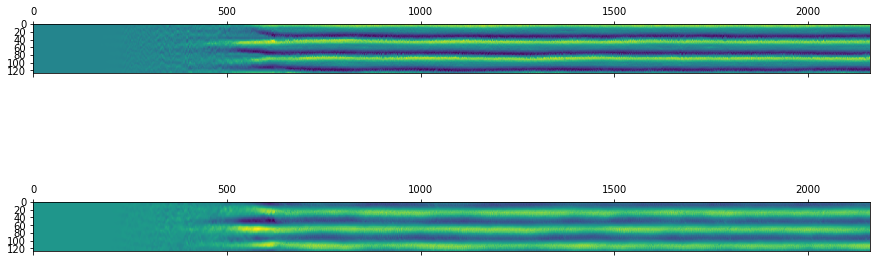

In [2]:
fig, ax = plt.subplots(2,figsize=(15,6))
ax[0].matshow(q_zonal_mean[:,:,0].T)
ax[1].matshow(q_zonal_mean[:,:,1].T)

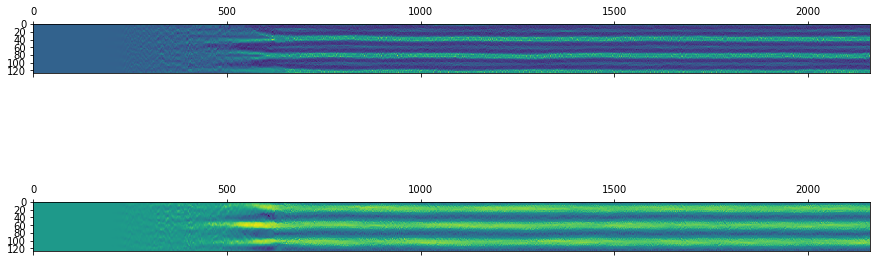

In [3]:
fig, ax = plt.subplots(2,figsize=(15,6))
ax[0].matshow(dq_zonal_mean[:,:,0].T)
ax[1].matshow(dq_zonal_mean[:,:,1].T)

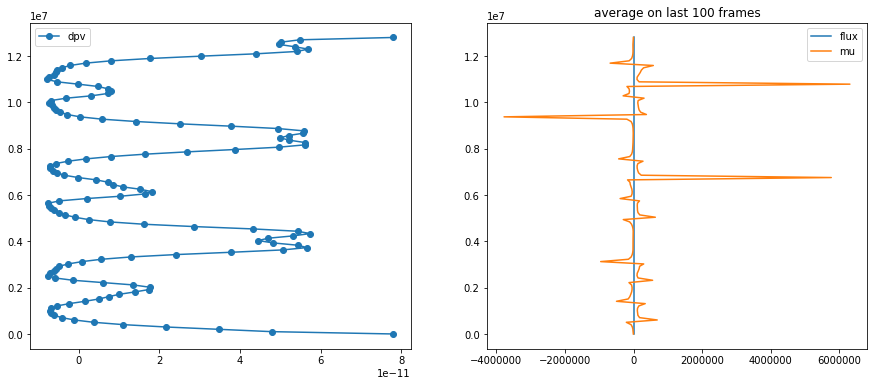

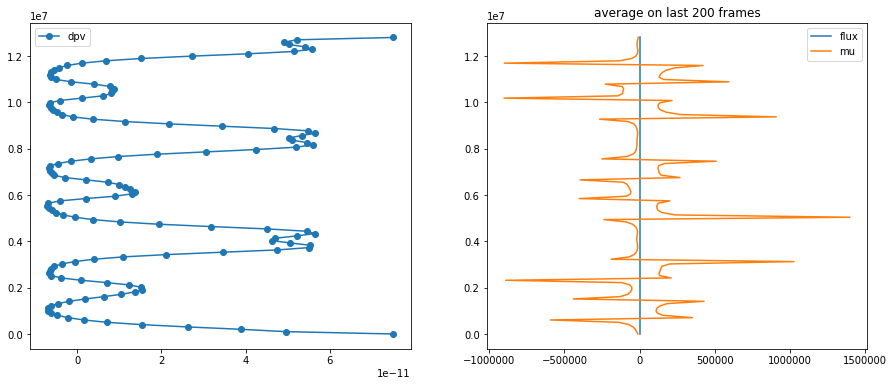

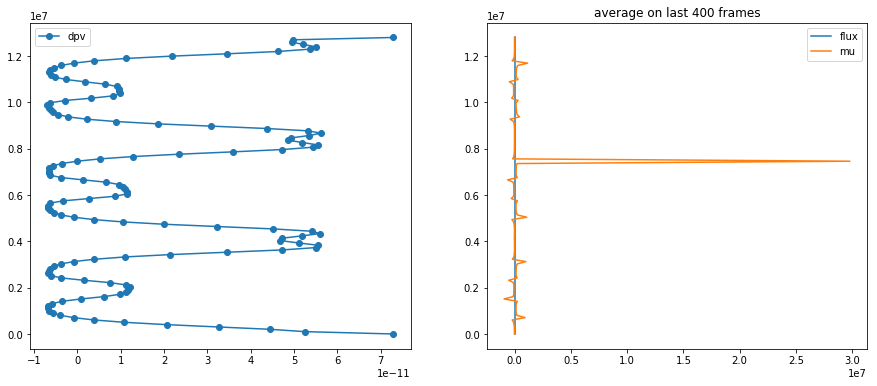

In [4]:
clipping = 1.0
for i in [100,200,400]:
    t_mean_steps = range(-i,-1)
    flux_mean    = np.mean(flux_zonal_mean[t_mean_steps, :, :], axis = 0)
    dpv_mean     = np.mean(dpv_zonal_mean[t_mean_steps, :, :], axis = 0)
    q_mean       = np.mean(q_zonal_mean[t_mean_steps, :, :], axis = 0)

    # clipping 
    # dpv_mean[np.logical_and(dpv_mean >=-clipping , dpv_mean <= 0.0)] = -clipping
    # dpv_mean[np.logical_and(dpv_mean <= clipping , dpv_mean >= 0.0)] =  clipping

    mu_mean = flux_mean / dpv_mean
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    ax[0].plot(dpv_mean[:, 0], yy, "-o", label="dpv")
    ax[1].plot(flux_mean[:, 0], yy, label="flux")
    ax[1].plot(mu_mean[:, 0], yy, label="mu")
    ax[0].legend()
    ax[1].legend()
    plt.title("average on last %d frames" %i)

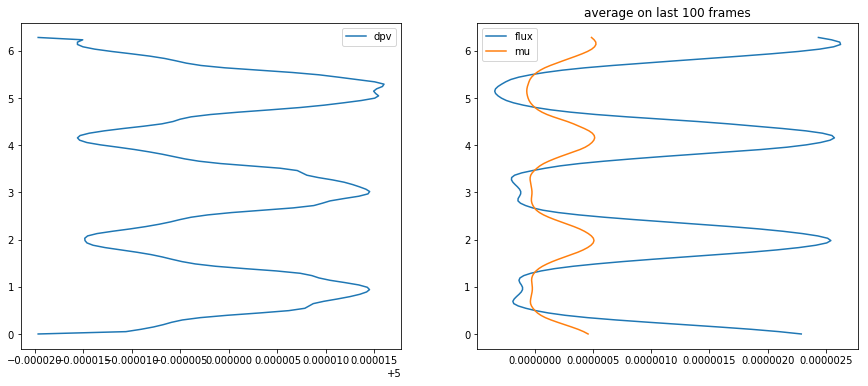

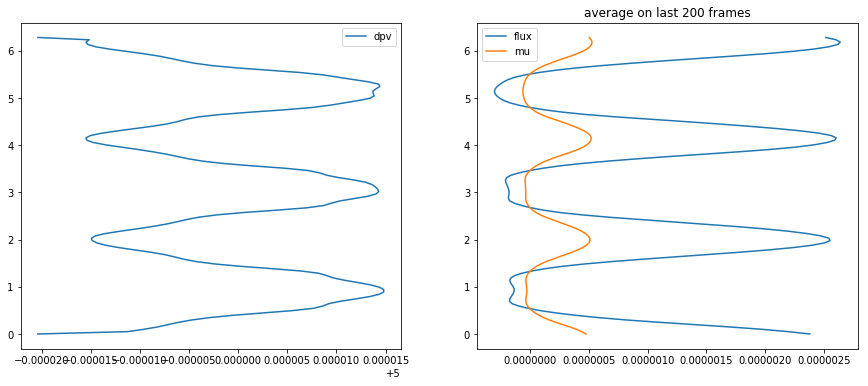

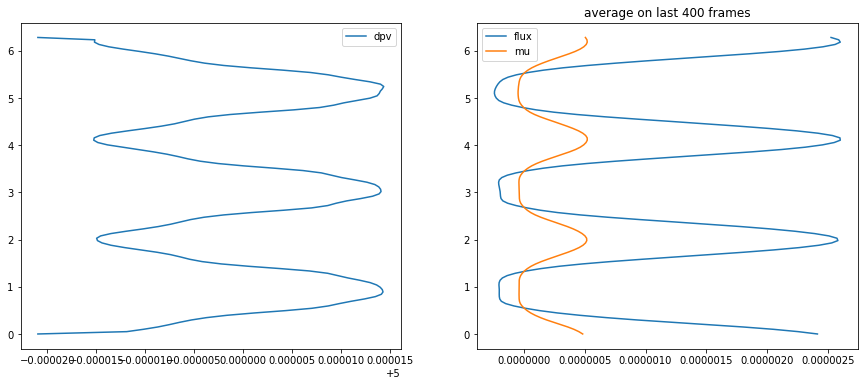

In [6]:
for i in [100,200,400]:
    t_mean_steps = range(-i,-1)
    flux_mean    = np.mean(flux_zonal_mean[t_mean_steps, :, :], axis = 0)
    dpv_mean     = np.mean(dpv_zonal_mean[t_mean_steps, :, :], axis = 0)
    q_mean       = np.mean(q_zonal_mean[t_mean_steps, :, :], axis = 0)

    # clipping 
    dpv_mean[np.logical_and(dpv_mean >=-0.1 , dpv_mean <= 0.0)] = -0.1
    dpv_mean[np.logical_and(dpv_mean <= 0.1 , dpv_mean >= 0.0)] =  0.1

    mu_mean = flux_mean / dpv_mean
    fig, ax = plt.subplots(1,2,figsize=(15,6))
    ax[0].plot(dpv_mean[:, 1], yy, label="dpv")
    ax[1].plot(flux_mean[:, 1], yy, label="flux")
    ax[1].plot(mu_mean[:, 1], yy, label="mu")
    ax[0].legend()
    ax[1].legend()
    plt.title("average on last %d frames" %i)

In [1]:
run Solver_q.py

q1  [ 0.00000000e+00  4.94537199e-09  9.87864183e-09  1.47877370e-08
  1.96606441e-08  2.44854382e-08  2.92503125e-08  3.39436063e-08
  3.85538344e-08  4.30697148e-08  4.74801964e-08  5.17744860e-08
  5.59420747e-08  5.99727639e-08  6.38566896e-08  6.75843473e-08
  7.11466148e-08  7.45347746e-08  7.77405353e-08  8.07560519e-08
  8.35739449e-08  8.61873185e-08  8.85897772e-08  9.07754419e-08
  9.27389639e-08  9.44755382e-08  9.59809149e-08  9.72514103e-08
  9.82839151e-08  9.90759028e-08  9.96254351e-08  9.99311673e-08
  9.99923511e-08  9.98088370e-08  9.93810738e-08  9.87101086e-08
  9.77975832e-08  9.66457306e-08  9.52573698e-08  9.36358983e-08
  9.17852840e-08  8.97100557e-08  8.74152919e-08  8.49066083e-08
  8.21901439e-08  7.92725465e-08  7.61609559e-08  7.28629866e-08
  6.93867094e-08  6.57406313e-08  6.19336749e-08  5.79751564e-08
  5.38747630e-08  4.96425290e-08  4.52888114e-08  4.08242645e-08
  3.62598137e-08  3.16066292e-08  2.68760979e-08  2.20797963e-08
  1.72294617e-08  1.2

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
q_data.shape

(1001, 2, 128)

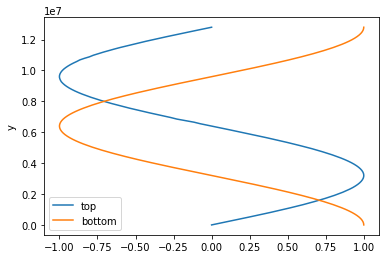

In [24]:
plt.figure()
plt.plot(np.mean(q_data[:, 0, :], axis=0), yy,  label="top")
plt.plot(np.mean(q_data[:, 1, :], axis=0), yy,  label="bottom")


plt.ylabel("y")
plt.legend()
plt.show()

In [23]:
q_data[0, :, :].shape

(2, 128)